In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

c:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset and displaying its first few rows
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dimensions of the dataset
df.shape

(10000, 14)

In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking for missing values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

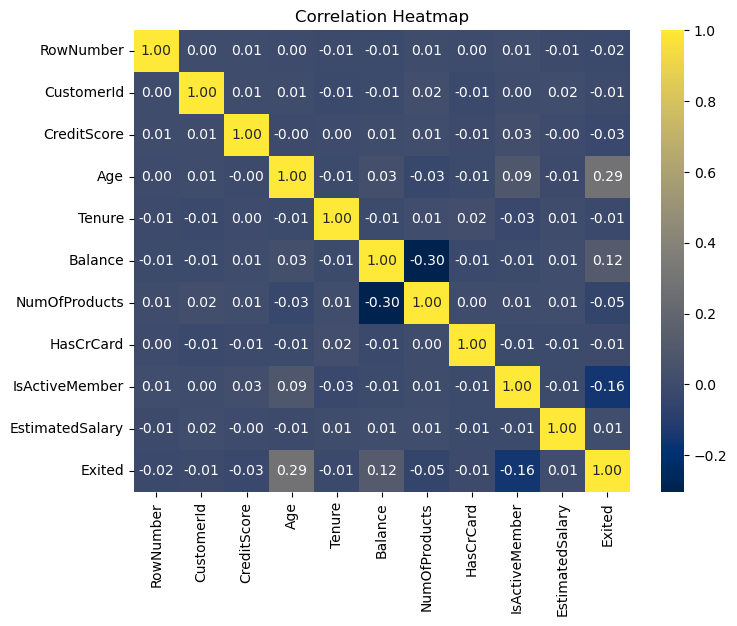

In [6]:
# Visualizing the dataset
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

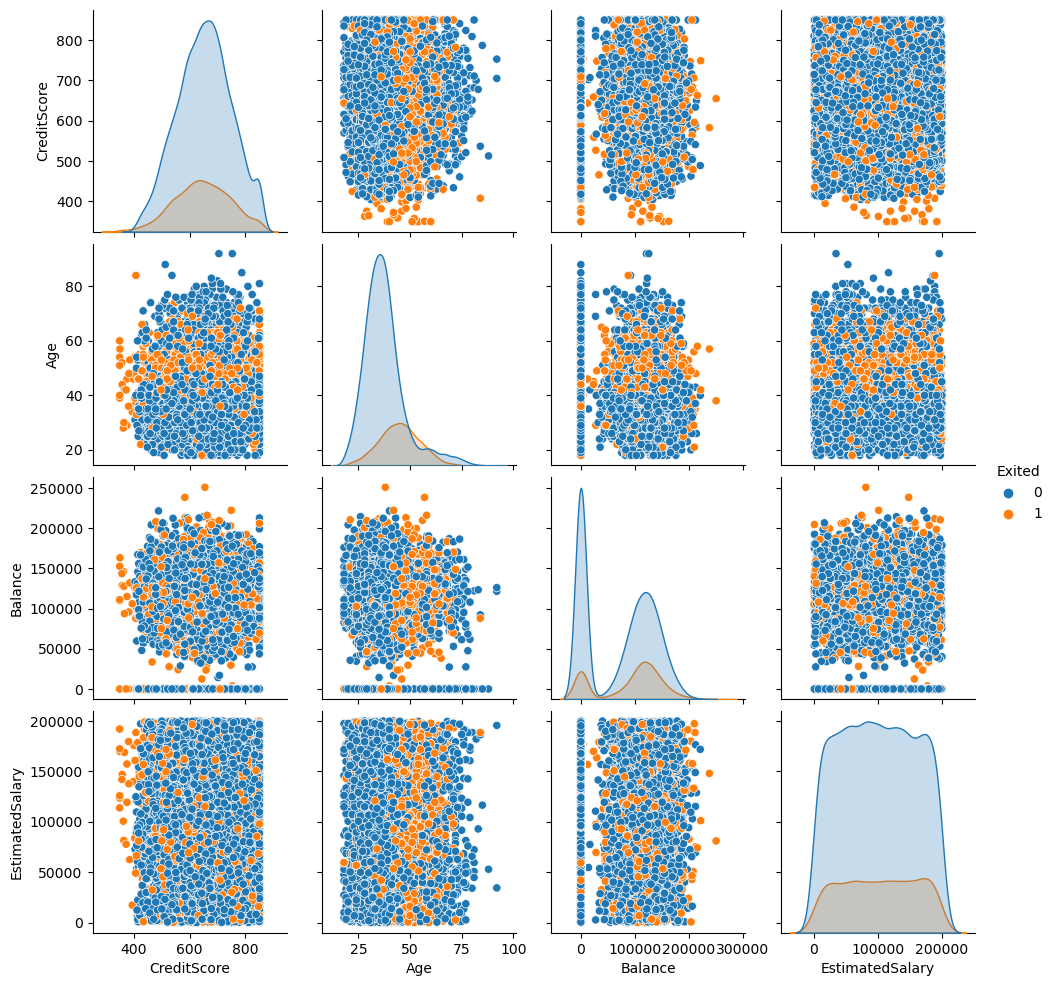

In [7]:
# Plotting a pairplot to visualize the relationships between multiple features
sns.pairplot(df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited')
plt.show()

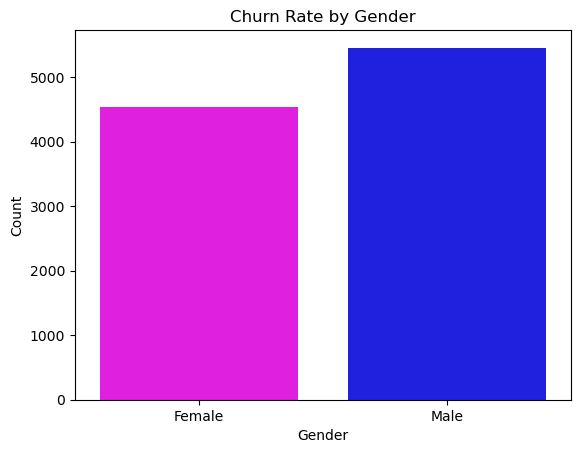

In [8]:
# Visualizing the role of gender in churn rate
custom_colors = ['magenta', 'blue']
sns.countplot(data=df, x='Gender', palette=custom_colors)
plt.title("Churn Rate by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

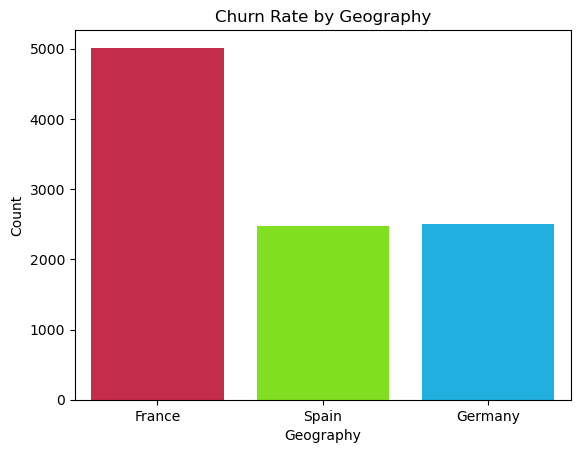

In [9]:
# Visualizing the role of geography in churn rate
custom_colors2 = ['crimson', 'chartreuse', 'deepskyblue']
sns.countplot(data=df, x='Geography', palette=custom_colors2)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title("Churn Rate by Geography")
plt.show()

In [10]:
# Preprocessing the data
df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# One-Hot Encoding categorical columns 'Geography' and 'Gender'
df = pd.get_dummies(df, drop_first=True)

In [13]:
# Defining the features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scaling the features using StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Building a Logistic Regression model and making predictions using it
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [17]:
# Evaluating the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.811
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



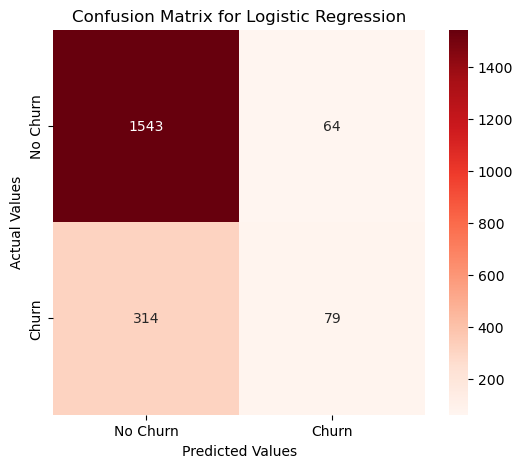

In [20]:
# Plotting confusion matrix for Logistic Regression model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Reds', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

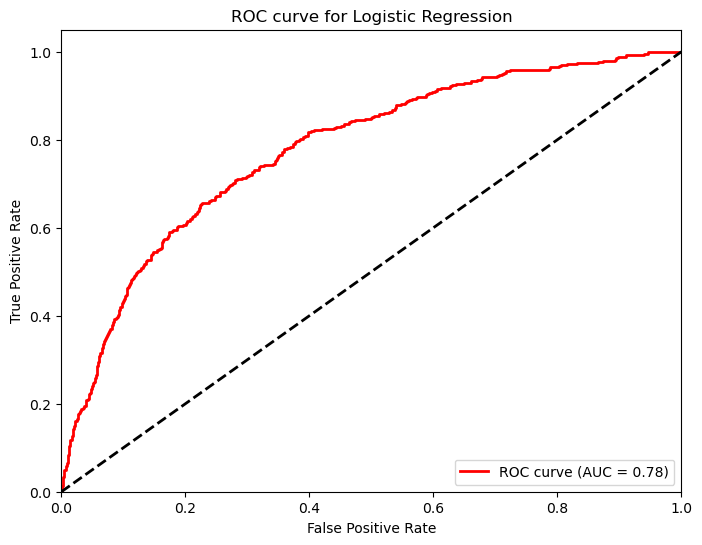

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Computing the ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) for Logistic Regression
# An AUC score close to 1 indicates better model performance
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Building a Random Forest Classifier model and making predictions using it
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

In [27]:
# Evaluating the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8665
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



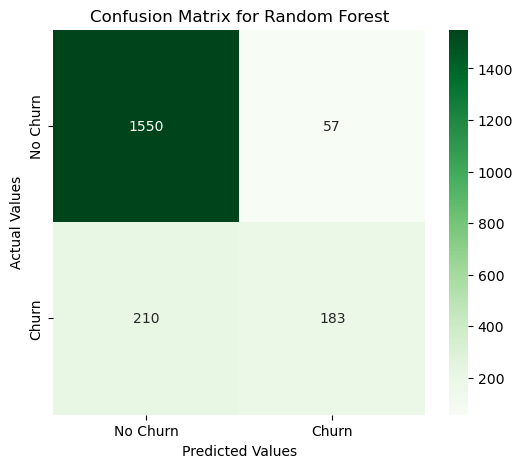

In [28]:
# Plotting confusion matrix for Random Forest model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

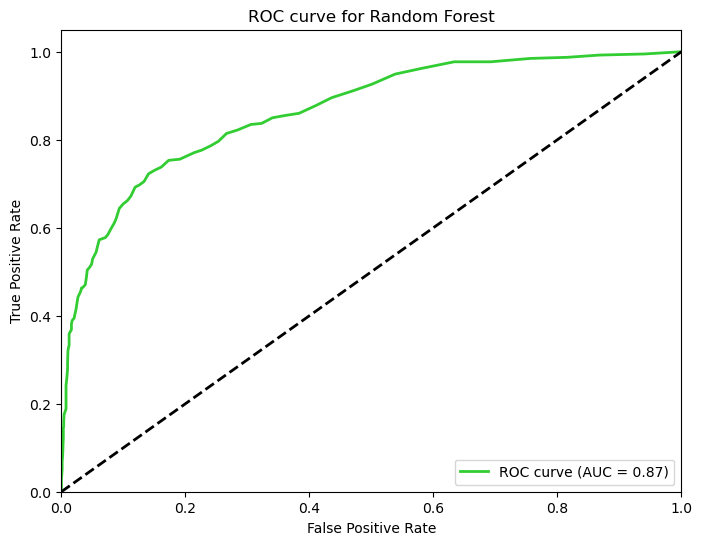

In [35]:
# Computing the ROC curve and AUC score for Random Forest model
y_pred_prob_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]  
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='limegreen', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Building a Gradient Boosting Classifier model and making predictions using it
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)

In [37]:
# Evaluating the Gradient Boosting model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8675
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



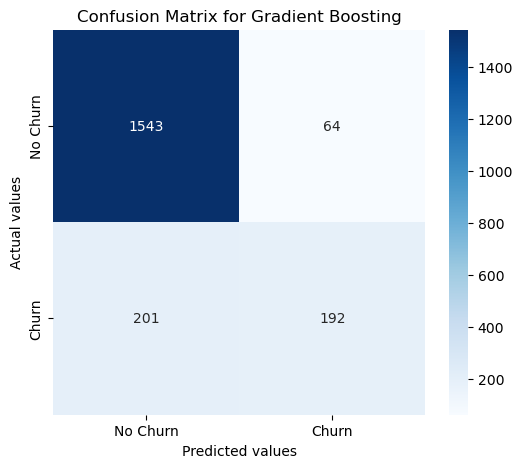

In [38]:
# Plotting confusion matrix for Gradient Boosting model
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

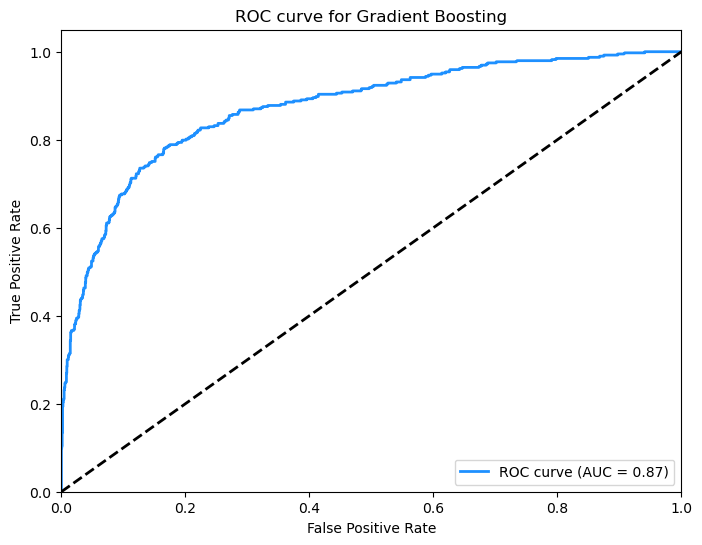

In [43]:
# Computing the ROC curve and AUC score for Gradient Boosting model
y_pred_prob_gb = gb_clf.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='dodgerblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Comparing the Logistic Regression, Random Forest and Gradient Boosting models
print(f"Logistic Regression AUC: {roc_auc:.2f}")
print(f"Random Forest AUC: {roc_auc_rf:.2f}")
print(f"Gradient Boosting AUC: {roc_auc_gb:.2f}")

Logistic Regression AUC: 0.78
Random Forest AUC: 0.87
Gradient Boosting AUC: 0.87
